# Проект сервиса аренды самокатов

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
 - без подписки
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 8 рублей;
        стоимость старта (начала поездки) — 50 рублей;
 - с подпиской Ultra
        абонентская плата — 199 рублей в месяц;
        стоимость одной минуты поездки — 6 рублей;
        стоимость старта — бесплатно.

# Описание данных
В основных данных есть информация о пользователях, их поездках и подписках. 

Пользователи — users_go.csv  
-   user_id - 	уникальный идентификатор пользователя  
-    name - имя пользователя  
-    age - возраст  
-    city -	город  
-    subscription_type -	тип подписки (free, ultra)

Поездки — rides_go.csv

- user_id - уникальный идентификатор пользователя  
- distance -	расстояние, которое пользователь проехал в текущей сессии (в метрах)  
- duration -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  
- date -	дата совершения поездки  

Подписки — subscriptions_go.csv

- subscription_type -	тип подписки
- minute_price -	стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee -	стоимость ежемесячного платежа

#### Шаг 1. Загрузка данных

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Чтение данных

users_go = pd.read_csv("C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 4/users_go.csv")
rides_go = pd.read_csv("C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 4/rides_go.csv")
subscriptions_go = pd.read_csv("C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 4/subscriptions_go.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


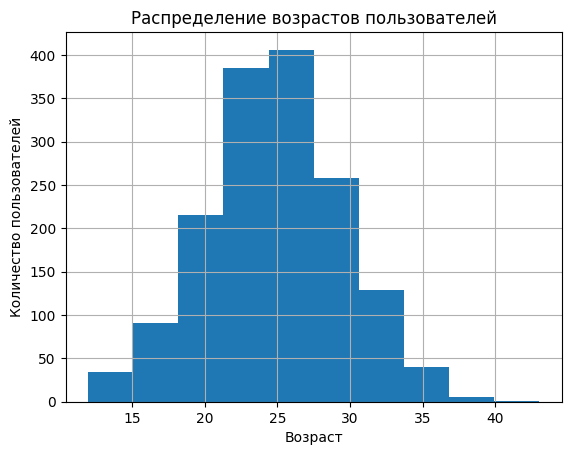

In [3]:
# Выведем информацию по датафрейму users_go
print(users_go.info()) 
print()
print(users_go.describe())
users_go['age'].hist()
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возрастов пользователей')
users_go.head()

In [4]:
# Уникальные идентификаторы
print(users_go['user_id'].count(), "- всего строк")
print(len(users_go['user_id'].unique()), "- уникальных значений")

1565 - всего строк
1534 - уникальных значений


В user_id  имеются дубликаты идентификаторов

In [5]:
# Уникальные названия населенных пунктов
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты в столбце ‘city’ не обнаружены.

In [6]:
# Уникальные типы
users_go['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

Имеющиеся значения в столбце ‘subscription_type’ позволяют изменить ‘ultra’ и ‘free’ на True и False соответственно, а также использовать для этого столбца тип данных ‘bool’.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963
   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   75

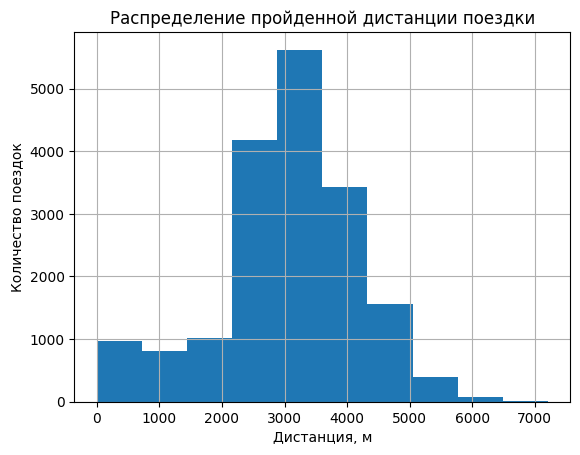

Text(0.5, 1.0, 'Распределение по длительности поездки')

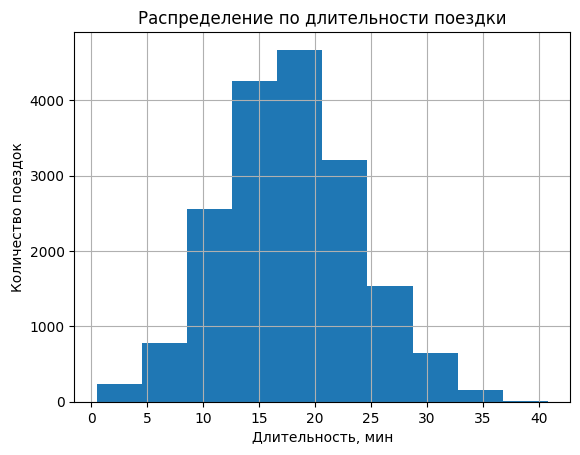

In [7]:
# Изучение датафрейма 'rides_go' 
print(rides_go.info())
print()
print(rides_go.describe())
print(rides_go.head())
rides_go['distance'].hist() 
plt.xlabel('Дистанция, м')
plt.ylabel('Количество поездок')
plt.title('Распределение пройденной дистанции поездки')
plt.show()
rides_go['duration'].hist() 
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')
plt.title('Распределение по длительности поездки')


В датафрейме ‘rides_go’ обнаружены 4 столбца и 18068 строк без пропусков и выбросов. Тип столбца  ‘date’ не оптимален. Названия столбцов соответствуют ‘змеиному’ стилю. Возможно наличие выбросов в столбцах ‘distance’ и ‘duration’.

In [8]:
# Уникальные идентификаторы
print(rides_go['user_id'].count(), "- всего строк")
print(len(rides_go['user_id'].unique()), "- уникальных значений")

18068 - всего строк
1534 - уникальных значений


In [9]:
# Изучение датафрейма 'subscriptions_go' 
print(subscriptions_go.info())
subscriptions_go.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

#####  Приведите столбец date к типу даты pandas.  


In [10]:
# Изменем столбец 'date' в датафрейме'rides_go'
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

In [11]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создайте новый столбец с номером месяца на основе столбца date.  

In [12]:
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month

# проверим за какие года имеются данные
print(pd.DatetimeIndex(rides_go['date']).year.unique())

# выведем столбец с месяцами
rides_go['month']

Int64Index([2021], dtype='int64', name='date')


0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month, Length: 18068, dtype: int64

#####  Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [13]:
# Проверка наличия дубликатов в 'users_go'
users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == True].count()

user_id              31
name                 31
age                  31
city                 31
subscription_type    31
dtype: int64

In [14]:
# Удаление дубликатов
users_go = users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == False]

In [15]:
# Проверка наличия дубликатов в 'users_go'
users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == True].count()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

**Промежуточный вывод**
1. В DataFrame users_go - имеются дубликаты идентификаторов. Неявные дубликаты в столбце ‘city’ не обнаружены. Пропуски отсутствуют
2. В датафрейме ‘rides_go’ отсутствуют пропуски, дубликаты и выбросы
3. В датафрейме subscriptions_go - обнаружены 4 столбца и 2 строки без пропусков и выбросов.


#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:  
3.1 частота встречаемости городов;  
3.2 соотношение пользователей с подпиской и без подписки;  
3.3 возраст пользователей;  
3.4 расстояние, которое пользователь преодолел за одну поездку;  
3.5 продолжительность поездок.  


##### Частота встречаемости городов;

In [16]:
cities = users_go.groupby('city')['user_id'].count().reset_index(name='count')
cities = cities.sort_values(by = 'count')

Text(0.5, 1.0, 'Статистика пользователей по городам')

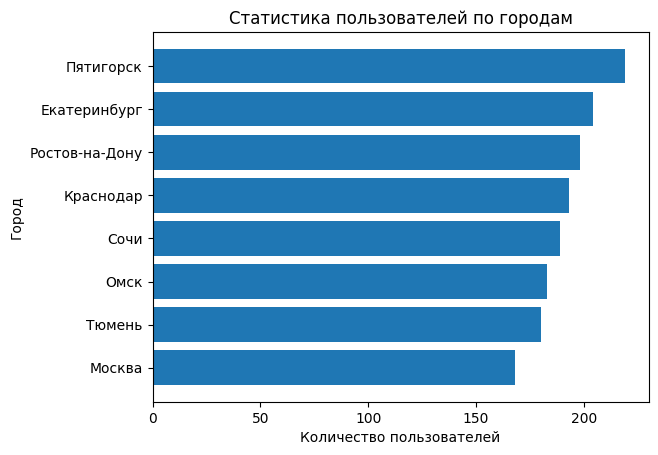

In [17]:
plt.barh(cities['city'], cities['count'])
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.title('Статистика пользователей по городам')

In [18]:
cities.sort_values(by = 'count', ascending = False)

,city,count
4,Пятигорск,219
0,Екатеринбург,204
5,Ростов-на-Дону,198
1,Краснодар,193
6,Сочи,189
3,Омск,183
7,Тюмень,180
2,Москва,168


Лидером по частотности является Пятигорск (219 строк). Следом идут Екатеринбург (204 строки) и Ростов-на-Дону (198 строк). Антилидер — Москва (168 строк).

##### Cоотношение пользователей с подпиской и без подписки;

In [19]:
subs = users_go.groupby('subscription_type')['user_id'].count().reset_index(name='count').sort_values(by = 'count')
subs['percent'] = subs['count'] / subs['count'].sum()
subs

,subscription_type,count,percent
1,ultra,699,0.455671
0,free,835,0.544329


Пользователей с подпиской «free» всего 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».

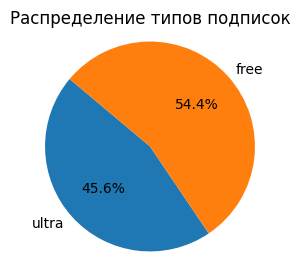

In [20]:
plt.figure(figsize=(3, 3)) 
plt.pie(subs['count'], labels=subs['subscription_type'], autopct='%1.1f%%', startangle=140)
plt.title('Распределение типов подписок')
plt.axis('equal')  
plt.show()

##### Возраст пользователей;

Text(0.5, 1.0, 'Распределение возрастов пользователей')

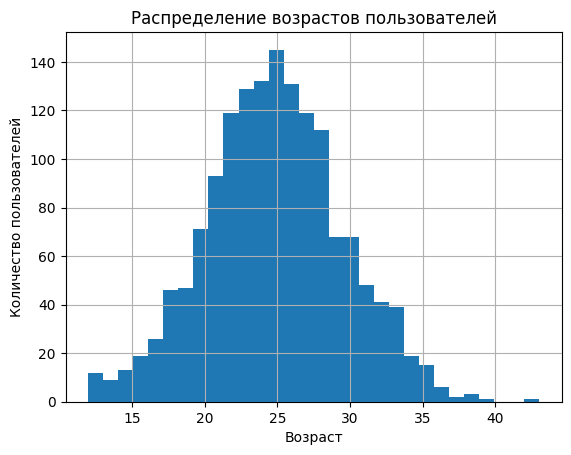

In [21]:
users_go['age'].hist(bins = 30)
users_go['age'].describe()
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возрастов пользователей')

Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.

##### Расстояние, которое пользователь преодолел за одну поездку;

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

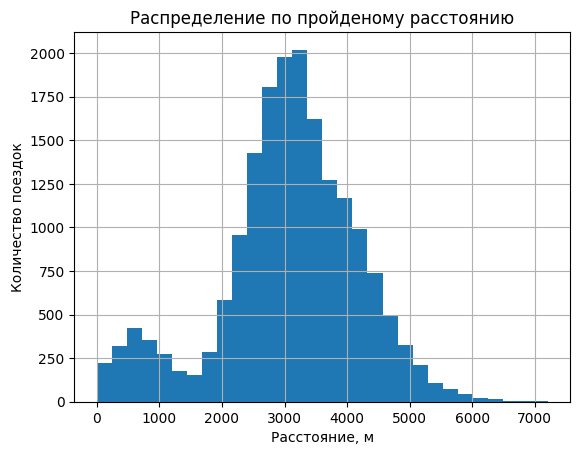

In [22]:
rides_go['distance'].hist(bins = 30)
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.title('Распределение по пройденому расстоянию')

rides_go['distance'].describe()

За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

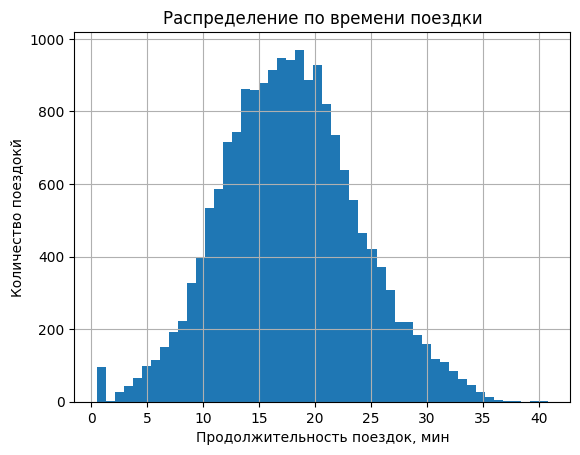

In [23]:
rides_go['duration'].hist(bins = 50)
plt.xlabel('Продолжительность поездок, мин')
plt.ylabel('Количество поездокй')
plt.title('Распределение по времени поездки')
rides_go['duration'].describe()

Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением.

Наблюдается анамалия размером менее 100 поездок с продолжительностью в 1 минуту. Однако, они не являются выбрасами, т.к. подкреплены данными о поездках со столь же маленькими дистанциями.

**ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА**  
Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.

Большая часть всех пользователей используют подписку «free». Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».

Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.

За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.

Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается выброс размером менее 100 поездок с продолжительностью в 1 минуту.

#### Шаг 4. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().  


In [24]:
# Общая таблица с данными
total_go = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')

In [25]:
total_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [26]:
print("Количество строк (поездок) в 'rides_go':", rides_go['user_id'].count())
print("Количество строк (поездок) в 'total_go':", total_go['user_id'].count())
print()
print("Количество уникальных пользователей в 'users_go':", len(users_go['user_id'].unique()))
print("Количество уникальных пользователей в 'total_go':", len(total_go['user_id'].unique()))
print()
print('Пропуски в users_go\n',users_go.isnull().sum())
print()
print('Пропуски в total_go\n',total_go.isnull().sum())

Количество строк (поездок) в 'rides_go': 18068
Количество строк (поездок) в 'total_go': 18068

Количество уникальных пользователей в 'users_go': 1534
Количество уникальных пользователей в 'total_go': 1534

Пропуски в users_go
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропуски в total_go
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


##### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1: c данными о пользователях без подписки; с данными о пользователях с подпиской.

In [27]:
# Датафрейм данных с пользователями с подпиской
ultra_go = total_go.loc[total_go['subscription_type'] == 'ultra']
# Датафрейм данных с пользователями без подписки
free_go = total_go.loc[total_go['subscription_type'] == 'free']


##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

In [28]:
ultra_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [29]:
free_go.head() 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [30]:
ultra_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [31]:
free_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [32]:
print("Разница описательных значений столбцов с числовыми данными датафреймов 'free_go' и 'ultra_go'") 
free_go.describe() - ultra_go.describe()

Разница описательных значений столбцов с числовыми данными датафреймов 'free_go' и 'ultra_go'


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.0,5068.0,5068.0
mean,771.801846,0.000711,-69.950106,-1.151076,0.100687,2.0,50.0,-199.0
std,40.066290,-0.276108,409.278476,0.754755,0.035154,0.0,0.0,0.0
min,699.000000,0.000000,-243.354755,-3.260353,0.000000,2.0,50.0,-199.0
25%,740.000000,0.000000,-418.881328,-1.566217,0.000000,2.0,50.0,-199.0
50%,772.000000,0.000000,-33.988764,-0.851263,1.000000,2.0,50.0,-199.0
75%,803.000000,0.000000,345.123469,-0.290058,0.000000,2.0,50.0,-199.0
max,835.000000,5.000000,1511.238083,-5.875464,0.000000,2.0,50.0,-199.0


Выводы из анализа разницы использования обоих типов подписки:

**Общее количество.** Поездок с исползьзованием подписки ‘free’ на 5068 больше, чем с использованием подписки ‘ultra’, и составляет 11568.  
**Возраст.** Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’.  
**Дистанция.** Дистанция поездок при использовании подписки ‘free’ более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’.  
**Продолжительность.** Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут.  
**Месяцы.** Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у подписчиков ‘free’ на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре.

count    11568.000000
mean        24.893326
std          4.481100
min         12.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         43.000000
Name: age, dtype: float64


count    6500.000000
mean       24.892615
std         4.757208
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        38.000000
Name: age, dtype: float64

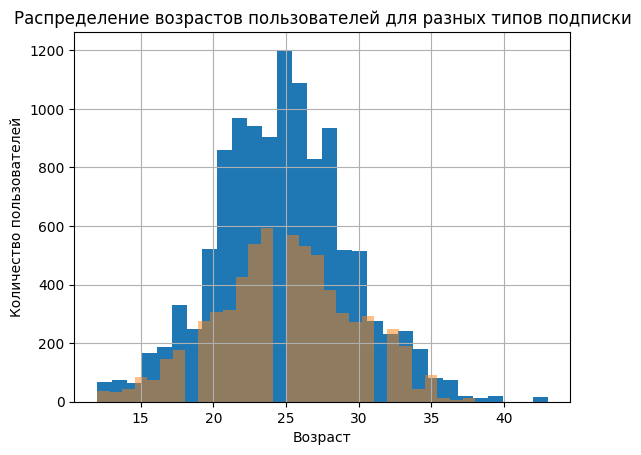

In [33]:
# Срвнение столбцов 'age' в 'ultra_go' и 'free_go'
free_go['age'].hist(bins = 30)
ultra_go['age'].hist(bins = 30, alpha = 0.5)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возрастов пользователей для разных типов подписки')
print(free_go['age'].describe())
ultra_go['age'].describe()

Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’ и равен 43 годам.

              free
count     8.000000
mean   1446.000000
std     173.412802
min    1175.000000
25%    1328.000000
50%    1483.500000
75%    1570.000000
max    1672.000000
            ultra
count    8.000000
mean   812.500000
std     61.923916
min    700.000000
25%    776.750000
50%    820.000000
75%    858.000000
max    885.000000


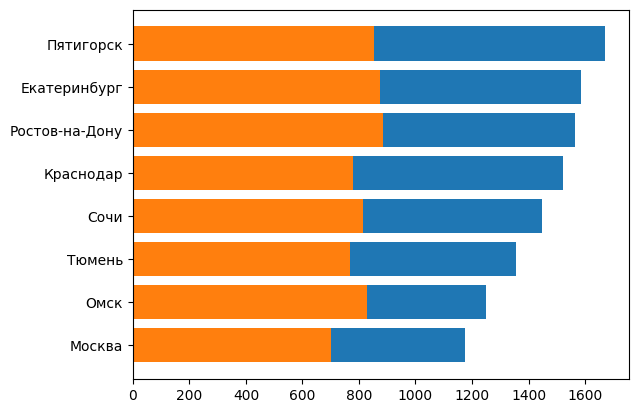

In [34]:
# Срвнение столбцов 'city' в 'ultra_go' и 'free_go'
cities = free_go.groupby('city')['user_id'].count().reset_index(name='free')
cities = cities.sort_values(by = 'free')
plt.barh(cities['city'], cities['free'])
print(cities.describe())
cities = ultra_go.groupby('city')['user_id'].count().reset_index(name='ultra')
cities = cities.sort_values(by = 'ultra')
plt.barh(cities['city'], cities['ultra'])
print(cities.describe())

Во всех городах доминирует подписка ‘free’. Пятигорск является лидером по использованию этиго типа подписки (1672 поездок, это 9.25% от общего количества поездок). Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок, это 4.9% от общего количества поездок). Минимальное количество поездок совершено в Москве с использованием подписки ‘ultra’ (700 поездок, это 3.87% от общего количества поездок).

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

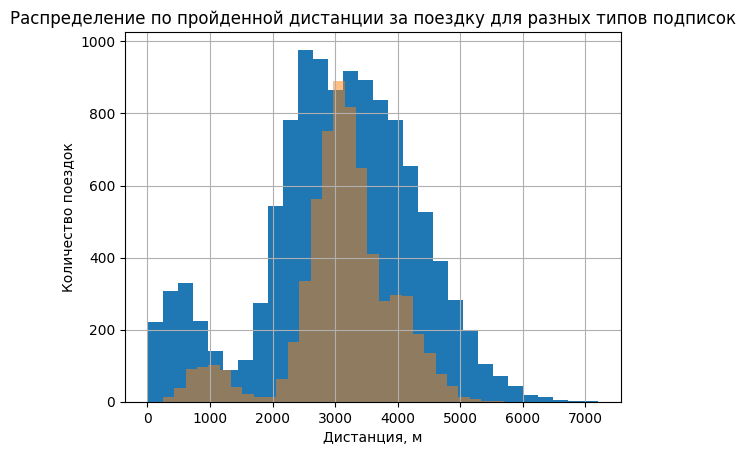

In [35]:
# Срвнение столбцов 'distance' в 'ultra_go' и 'free_go'
free_go['distance'].hist(bins = 30)
ultra_go['distance'].hist(bins = 30, alpha = 0.5)

plt.xlabel('Дистанция, м')
plt.ylabel('Количество поездок')
plt.title('Распределение по пройденной дистанции за поездку для разных типов подписок')
print(free_go['distance'].describe())
ultra_go['distance'].describe()

Дистанция поездок при использовании подписки ‘free’ более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’.  

При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик ‘free’ в районе 700 метров, а основной 2500-3500 метров. В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

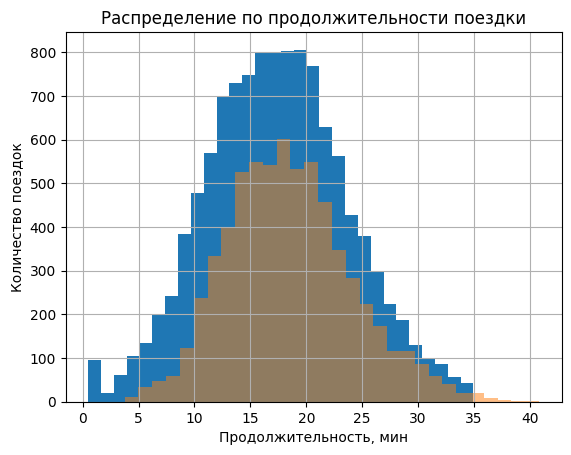

In [36]:
# Срвнение столбцов 'duration' в 'ultra_go' и 'free_go'
free_go['duration'].hist(bins = 30)
ultra_go['duration'].hist(bins = 30, alpha = 0.5)
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.title('Распределение по продолжительности поездки')
print(free_go['duration'].describe())
ultra_go['duration'].describe()

Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.

count    11568.000000
mean         6.522994
std          3.449770
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64


count    6500.000000
mean        6.422308
std         3.414616
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: month, dtype: float64

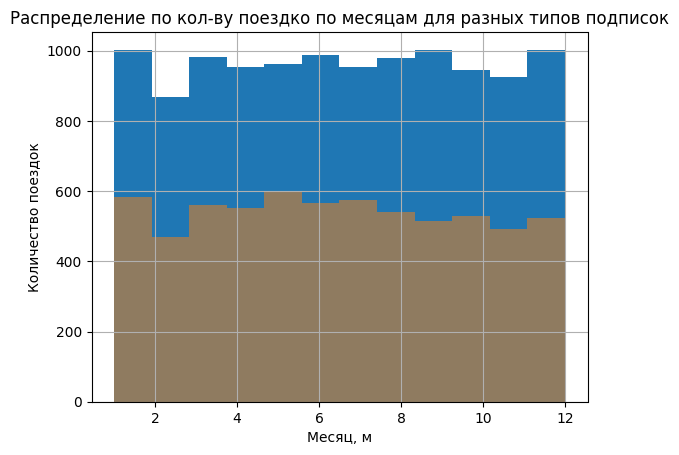

In [37]:
# Срвнение столбцов 'month' в 'ultra_go' и 'free_go'
free_go['month'].hist(bins = 12)
ultra_go['month'].hist(bins = 12, alpha = 0.5)
plt.xlabel('Месяц, м')
plt.ylabel('Количество поездок')
plt.title('Распределение по кол-ву поездко по месяцам для разных типов подписок')
print(free_go['month'].describe())
ultra_go['month'].describe()

Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у подписчиков ‘free’ на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской ‘free’ в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки ‘free’ нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.

Выводы из сравнения использования разных типов подписки:

1. **Общее количество.** Поездок с исползьзованием подписки ‘free’ на 5068 больше, чем с использованием подписки ‘ultra’, и составляет 11568.  
Возраст. Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’.  
2. **Дистанция.** Дистанция поездок при использовании подписки ‘free’ более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’. При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик ‘free’ в районе 700 метров, а основной 2500-3500 метров. В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.  
3. **Продолжительность.** Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.
4. **Месяцы.** Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у подписчиков ‘free’ на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской ‘free’ в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки ‘free’ нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.  
5. **Города.** Во всех городах доминирует подписка ‘free’. Пятигорск является лидером по использованию этиго типа подписки (1672 поездок). Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок).

#### Шаг 5. Подсчёт выручки

##### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [38]:
# Округление продолжительности поездок в 'duration'
total_go['duration'] = np.ceil(total_go['duration'])


In [39]:
# Создание сводной таблицы
users_go_pivot = total_go.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=('count', 'sum'))
users_go_pivot

distance               duration       minute_price      \
                 count           sum    count   sum        count sum   
user_id month                                                          
1       1            2   7027.511294        2  42.0            2  12   
        4            1    754.159807        1   7.0            1   6   
        8            2   6723.470560        2  46.0            2  12   
        10           2   5809.911100        2  32.0            2  12   
        11           3   7003.499363        3  56.0            3  18   
...                ...           ...      ...   ...          ...  ..   
1534    6            2   3409.468534        2  26.0            2  16   
        8            2   7622.453034        2  48.0            2  16   
        9            1   4928.173852        1  23.0            1   8   
        11           4  13350.015305        4  78.0            4  32   
        12           1   2371.711192        1  16.0            1   8   

              start_ride_price      subscription_fee       
                         count  sum            count  sum  
user_id month                                              
1       1                    2    0                2  398  
        4                    1    0                1  199  
        8                    2    0                2  398  
        10                   2    0                2  398  
        11                   3    0                3  597  
...                        ...  ...              ...  ...  
1534    6                    2  100                2    0  
        8                    2  100                2    0  
        9                    1   50                1    0  
        11                   4  200                4    0  
        12                   1   50                1    0  

[11331 rows x 10 columns]

In [40]:
# Переименование "двухэтажных" названий столбцов
users_go_pivot.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]
users_go_pivot

count      distance  count2  duration  count3  minute_price  \
user_id month                                                                
1       1          2   7027.511294       2      42.0       2            12   
        4          1    754.159807       1       7.0       1             6   
        8          2   6723.470560       2      46.0       2            12   
        10         2   5809.911100       2      32.0       2            12   
        11         3   7003.499363       3      56.0       3            18   
...              ...           ...     ...       ...     ...           ...   
1534    6          2   3409.468534       2      26.0       2            16   
        8          2   7622.453034       2      48.0       2            16   
        9          1   4928.173852       1      23.0       1             8   
        11         4  13350.015305       4      78.0       4            32   
        12         1   2371.711192       1      16.0       1             8   

               count4  start_ride_price  count5  subscription_fee  
user_id month                                                      
1       1           2                 0       2               398  
        4           1                 0       1               199  
        8           2                 0       2               398  
        10          2                 0       2               398  
        11          3                 0       3               597  
...               ...               ...     ...               ...  
1534    6           2               100       2                 0  
        8           2               100       2                 0  
        9           1                50       1                 0  
        11          4               200       4                 0  
        12          1                50       1                 0  

[11331 rows x 10 columns]

In [41]:
# Удаление дублирующих столбцов с подсчитанным количеством строк 
users_go_pivot = users_go_pivot.drop(['count2', 'count3', 'count4', 'count5'], axis=1)
users_go_pivot


count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0            12                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0            12                 0   
        10         2   5809.911100      32.0            12                 0   
        11         3   7003.499363      56.0            18                 0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0            16               100   
        8          2   7622.453034      48.0            16               100   
        9          1   4928.173852      23.0             8                50   
        11         4  13350.015305      78.0            32               200   
        12         1   2371.711192      16.0             8                50   

               subscription_fee  
user_id month                    
1       1                   398  
        4                   199  
        8                   398  
        10                  398  
        11                  597  
...                         ...  
1534    6                     0  
        8                     0  
        9                     0  
        11                    0  
        12                    0  

[11331 rows x 6 columns]

In [42]:
# Приведение столбцов с ценами к целевому состоянию
users_go_pivot['start_ride_price'] = users_go_pivot['start_ride_price'] / users_go_pivot['count']
users_go_pivot['minute_price'] = users_go_pivot['minute_price'] / users_go_pivot['count']
users_go_pivot['subscription_fee'] = users_go_pivot['subscription_fee'] / users_go_pivot['count']

users_go_pivot

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      16.0           8.0              50.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  
...                         ...  
1534    6                   0.0  
        8                   0.0  
        9                   0.0  
        11                  0.0  
        12                  0.0  

[11331 rows x 6 columns]

##### Добавление столбца с помесячной выручкой, которую принёс каждый пользователь

In [43]:
print(users_go_pivot.isnull().sum())

count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64


In [44]:
# Расчет и округление выручки
users_go_pivot['revenue'] = (
    (users_go_pivot['start_ride_price'] * users_go_pivot['count']) 
    + (users_go_pivot['minute_price'] * users_go_pivot['duration']) 
    + users_go_pivot['subscription_fee']
)

# Удаление столбцов со вспомогательными данными
users_go_pivot = users_go_pivot.drop(['start_ride_price', 'minute_price'], axis=1)

users_go_pivot.head(10)

count      distance  duration  subscription_fee  revenue
user_id month                                                          
1       1          2   7027.511294      42.0             199.0    451.0
        4          1    754.159807       7.0             199.0    241.0
        8          2   6723.470560      46.0             199.0    475.0
        10         2   5809.911100      32.0             199.0    391.0
        11         3   7003.499363      56.0             199.0    535.0
        12         2   6751.629942      28.0             199.0    367.0
2       3          3  10187.723006      63.0             199.0    577.0
        4          2   6164.381824      40.0             199.0    439.0
        6          1   3255.338202      14.0             199.0    283.0
        7          2   6780.722964      48.0             199.0    487.0

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. 

Нулевая и альтернативная гипотезы:  
1. Гипотеза Н0: Средняя продолжительность поездок с подпиской ‘ultra’ и ‘free’ равна.  
2. Гипотеза Н1: Средняя продолжительность поездок с подпиской ‘ultra’ больше, чем с подпиской ‘free’.

In [45]:
results = st.ttest_ind(ultra_go['duration'], free_go['duration'], alternative='greater')
print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645613e-34
Отвергаем нулевую гипотезу


**Вывод.** Нулевую гипотезу о равенстве среднего времени поездки отвергли, есть основания утверждать, что средняя длительность поездок подписчиков выше.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая и альтернативная гипотезы:  
1. Гипотеза Н0: Среднее расстояние поездок с использованием подписки ‘ultra’ равно оптимальному расстоянию в 3130 метров.  
2. Гипотеза Н1: Среднее расстояние поездок с использованием подписки ‘ultra’ более 3130 метров.

In [46]:
results = st.ttest_1samp(ultra_go['distance'], 3130, alternative='greater')
print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод.** Не получилось отвергнуть гипотезу о том, что среднее расстояние поездок с использованием подписки ‘ultra’ (меньше или) равно 3130 метров

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая и альтернативная гипотезы:  
1. Гипотеза Н0: Средняя выручка от поездок с разной подпиской равна.  
2. Гипотеза Н1:  Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.

In [47]:
results = st.ttest_ind(
    users_go_pivot.loc[users_go_pivot['subscription_fee'] > 0, 'revenue'],
    users_go_pivot.loc[users_go_pivot['subscription_fee'] == 0, 'revenue'],
    alternative='greater'
)

print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод.** Отвергаем нулевую гипотезу о том, что средняя выручка от поездок с использованием подписки ‘ultra’ равна средней выручке с ипользованием подписки ‘free’.

Выручка от подписки ‘ultra’ может быть больше, чем от подписки ‘free'.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Сначала требуется провести сравнение выборок на предмет соответствия уникальных пользователей в них.  

Если списки уникальных пользователей в них совпадают, то выборки зависимы и для проверки гипотезы потребуется тест st.ttest_rel(before, after, alternative=’less’)

Если же списки разные то, можно использовать тест:
st.ttest_ind(before, after, equal_var=False, alternative=’less’).  
Где, equal_var=False, т.к. выборки не равны, а alternative=’less’, т.к. основная гипотеза отвергается, если изначально обращений было меньше, чем после обновлений сервиса.

#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.   
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [48]:
n = 1169
p = 0.1
x = 0.05
# Расчет параметров нормального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5
# Расчет нормального распределения
distr = st.norm(mu, sigma)
# Расчет значения для заданной вероятности x
result = distr.ppf(x)
result

100.02841955223582

Требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [49]:
n = 1000000
p = 0.4
x = 399500

# Расчет параметров нормального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5
# Расчет нормального распределения
distr = st.norm(mu, sigma) 
# Расчет вероятности для заданного значения x
result = distr.cdf(x)
result

0.15371708296369768

399.5 тыс. клиентов откроют уведомления с вероятностью 15.37%, если разослать 1 млн. уведомлений, которые открывают клиенты с вероятностью 40%.

# ВЫВОДЫ ПРОЕКТА

Все исходные данные во всех файлах не содержали пропусков, значительных выбросов, а также дубликатов, кроме тех, которые были обнаружены в файле ‘users_go.csv’. При копировании данных из файлов в датафреймы, данные столбцов были не в оптимальном состоянии. В ходе предобработки данных они были оптимизированы для целей данного проекта.

В ходе исследовательского анализа данных было выявлено:

- Пользователей с подпиской «free» всего 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
- Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
- Большая часть всех пользователей используют подписку «free». Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
- Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.
- За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.
- Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается выброс размером менее 100 поездок с продолжительностью в 1 минуту.

В результате группировки данных выявлено:

- Поездок с исползьзованием подписки ‘free’ на 5068 больше, чем с использованием подписки ‘ultra’, и составляет 11568.
- Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’.
- Дистанция поездок при использовании подписки ‘free’ более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании ‘ultra’. При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик ‘free’ в районе 700 метров, а основной 2500-3500 метров. В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.
- Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, чем при использовании ‘ultra’. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.
- Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у подписчиков ‘free’ на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской ‘free’ в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки ‘free’ нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.
- Во всех городах доминирует подписка ‘free’. Пятигорск является лидером по использованию этиго типа подписки (1672 поездок). Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок).


Средняя продолжительность поездок с подпиской ‘ultra’ может быть выше средней продолжительности с подпиской ‘free’. 
Средняя выручка от поездок с использованием подписки ‘ultra’ равна (или больше) средней выручке с ипользованием подписки ‘free’. Поэтому можно сказать, что они более выгодны для сервиса аренды самокатов